current parameters:  [4, 3, 2, 1] 
 current estimators : [0.4, 0.3, 0.2, 0.1]


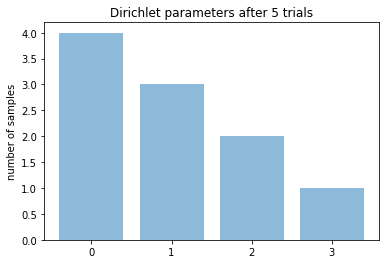

current parameters:  [4, 4, 3, 4] 
 current estimators : [0.26666666666666666, 0.26666666666666666, 0.2, 0.26666666666666666]


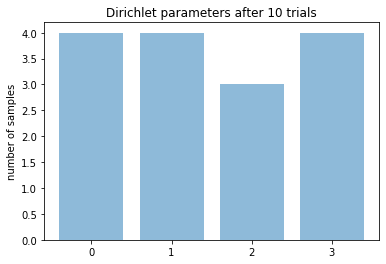

current parameters:  [7, 6, 3, 9] 
 current estimators : [0.28, 0.24, 0.12, 0.36]


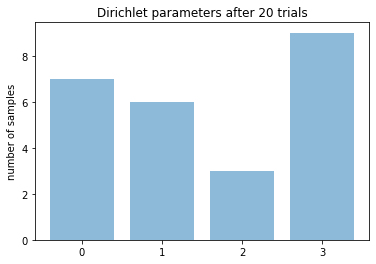

current parameters:  [16, 13, 4, 22] 
 current estimators : [0.2909090909090909, 0.23636363636363636, 0.07272727272727272, 0.4]


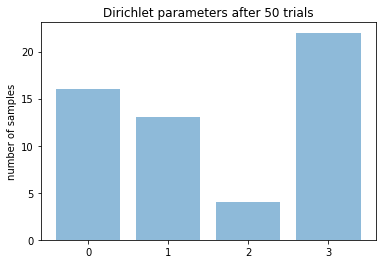

current parameters:  [36, 23, 9, 37] 
 current estimators : [0.34285714285714286, 0.21904761904761905, 0.08571428571428572, 0.3523809523809524]


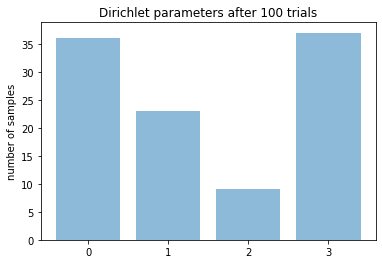

current parameters:  [70, 45, 20, 70] 
 current estimators : [0.34146341463414637, 0.21951219512195122, 0.0975609756097561, 0.34146341463414637]


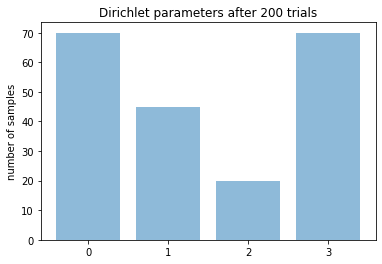

current parameters:  [193, 104, 50, 158] 
 current estimators : [0.3821782178217822, 0.20594059405940593, 0.09900990099009901, 0.31287128712871287]


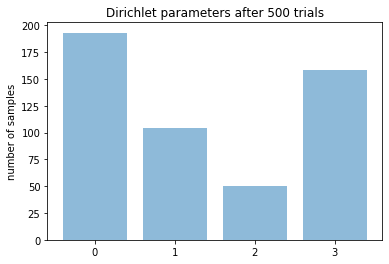

current parameters:  [393, 199, 107, 306] 
 current estimators : [0.39104477611940297, 0.19800995024875623, 0.10646766169154229, 0.3044776119402985]


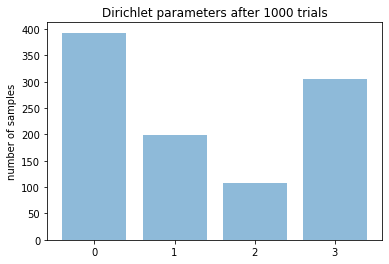

current parameters:  [583, 303, 167, 452] 
 current estimators : [0.387375415282392, 0.20132890365448505, 0.11096345514950166, 0.30033222591362124]


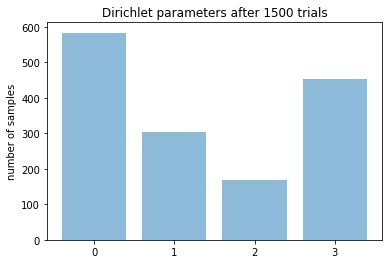

current parameters:  [786, 381, 217, 620] 
 current estimators : [0.39221556886227543, 0.19011976047904192, 0.10828343313373254, 0.3093812375249501]


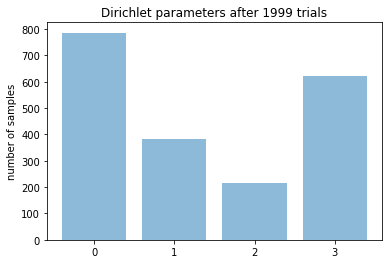

In [3]:

# an n-sided die; approximate the probability mass function using Bayesian inference
#conjugate pair: Dirichlet prior, Bernoulli likelihood

import numpy as np

import matplotlib.pyplot as plt

#Suppose you have a four-sided die with probabilities for outcomes '0', '1', '2', '3'
p= {0: 0.4, 1:0.2, 2:0.1, 3:0.3} #dictionary of probabilities p0=0.7, p1=0.05, p2=0.05, p3=0.2; we try to infer these values from the simulation
# assume the vector of mass probabilites (p0,p1,p2,p3) is unknown and follows a Dirichlet distribution with concentration parameters alpha= (alpha0,..,alpha3)
# these parameters are updated after each trial
# in the end, we have estimators for the p-values: the mean of the Dirichlet distribution 

class Die(object):

  def __init__(self, p):
    self.p=p                  # dictionary of true mass probabilities
    self.alpha=[1]*len(p)  #the list of parameters, initialized to a vector of 1's;

# get the cumulative probabilities; we use these in sampling
    cumul={}
    for i in range(len(p)):
      sum=0
      j=0
      while (j<=i):
        sum=sum+p[j]
        j=j+1
      cumul[i]=sum

    self.cumul=cumul #dictionary of cumulative probabilities

#take a sample from this distribution p; also return the corresponding label
  def sample(self):
    sample=np.random.random() # generate a random number in (0,1)
    label=0
    if sample>self.cumul[0]:
  
      for key in range(0, len(self.cumul)-1):
        if self.cumul[key]<sample<self.cumul[key+1]:
          label=key+1
    return sample, label


def plot(die, i):
  outcomes = ('0', '1', '2', '3')
  y_pos = np.arange(len(outcomes))
  
  plt.bar(y_pos, die.alpha, align='center', alpha=0.5)
  plt.xticks(y_pos, outcomes)
  plt.ylabel('number of samples')
  plt.title("Dirichlet parameters after %s trials" % i)

  plt.show()

def experiment():

  die=Die(p) # create Die object

  num_trials=2000
  sample_points = [5,10,20,50,100,200,500,1000,1500,1999]  #number of trials

  for i in range(num_trials):
    s,l=die.sample()
  # update concentration parameters
    die.alpha[l]=die.alpha[l]+1
    estimators=[x/sum(die.alpha) for x in die.alpha] #the mean vector of the Dirichlet distribution will estimate the probabilities

    if i in sample_points:
      print ("current parameters: ", die.alpha, "\n current estimators :", estimators)
      plot(die, i)
       
if __name__ == "__main__":
  experiment()
